<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/regression-modeling-HousePrices/blob/main/Mod_3_House_Prices_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1T15VtcJFBm4mtg9WGiOuHo01eKdAly3Q?usp=sharing

Earlier versions of this code include additional EDA, reasoning for cleanup and handling missing data.
*   v0 - https://colab.research.google.com/drive/1gKRrXN0jYrheIwl3eefoSEj9gh3FwewI
*   v1 - https://colab.research.google.com/drive/1Cg5IznYQKiKiPJjcd3S_TltXvsYuW5Cw#scrollTo=WeDqFsFMadku
*   v2 (part1) - https://colab.research.google.com/drive/1mryWq2_iZNdTU_TyRtH-5n162GsY_jpn#scrollTo=9HWrWlpE3gFQ

Data taken from - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

### Import modules and data files

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_train_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [ ]:
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#df_train_original.describe()
df_test_original.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Merge and clean data

#### Merge data

In [ ]:
# Create working datasets
df_train = df_train_original
df_test =  df_test_original

# Add a variable to both df_train and df_test indicating whether train or test dataset
df_train['TestYes'] = 0
df_test['TestYes'] = 1

# Create merged dataset used to cleanup data
df_merged = pd.concat([df_train, df_test])

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

#### Clean data

Handling systematic missing data as per v0 and v1 versions of the code.

In [ ]:
# Removing features where data is hard to predict
df_merged = df_merged.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities', 'LotFrontage'], axis=1)
# Small number have observations for Alley, PoolQC, Fence and MiscFeatures, doesn't make sense to predict these for all the rest
# LotFrontage is a numeric variable that has lots of missing values
# Removed Utilities because all but one observation had Utilities = AllPub, wouldn't make a significant difference on prediciton

# Modifying FireplaceQu missing values to indicate "NF" to indicate "No Fireplace"
df_merged['FireplaceQu'] = df_merged['FireplaceQu'].fillna('NF')

# Modifying MasVnrArea and MasVnrType missing values to indicate "0" and "None" respectively.
# Assumption: if these values are missing there is no masonry veneer.
df_merged['MasVnrType'] = df_merged['MasVnrType'].fillna('None')
df_merged['MasVnrArea'] = df_merged['MasVnrArea'].fillna(0)

# When GarageArea is 0 categorical variables GarageType, GarageFinish, GarageQual and GarageCond should be set to "NG" to indicate "No Garage"
columns_to_update = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_merged.loc[df_merged['GarageArea'] == 0, columns_to_update] = 'NG'

# When GarageArea is 0 set GarageYrBlt to 0
df_merged.loc[df_merged['GarageArea'] == 0, 'GarageYrBlt'] = 0

# Set BsmTExpsoure to "No" for missing values if all square footage in the basement is unfinished
df_merged.loc[(df_merged['BsmtFinSF1'] == 0) & (df_merged['BsmtFinSF2'] == 0) & (df_merged['BsmtUnfSF'] > 0) & (df_merged['BsmtExposure'].isna()), 'BsmtExposure'] = 'No'

# Assume if TotalBsmtSF is missing, there is no basement
df_merged['TotalBsmtSF'] = df_merged['TotalBsmtSF'].fillna(0)

# When TotalBsmtSF is 0 categorical variables BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 should be set to "NB" to indicate "No Basement"
columns_to_update = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_merged.loc[df_merged['TotalBsmtSF'] == 0, columns_to_update] = 'NB'

# When TotalBsmtSF is 0 numerical variables BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, BsmtFullBath and BsmtHalfBath should be set to 0.
columns_to_update = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
df_merged.loc[df_merged['TotalBsmtSF'] == 0, columns_to_update] = 0

# Set missing values of BsmtFinType2 to "Unf" if BsmtFinType1 isn't "NB"
df_merged.loc[(df_merged['BsmtFinType1'] != 'NB') & (df_merged['BsmtFinType2'].isna()), 'BsmtFinType2'] = 'Unf'

# MSSubClass Dtype should be changed to object
df_merged['MSSubClass'] = df_merged['MSSubClass'].astype(str)


Creating a variable med_GartoHouseBlt, critical to predict GarageYrBlt missing values, refer to "Missing garage data" section in v2 version of thise code.

In [ ]:
#Id 2127 and 2577 have missing GarageYrBlt data

# Filtering down to houses that were remodeled and have a detached garage
filtered_df = df_merged[df_merged['GarageType'] != 'NG']
filtered_df = filtered_df[filtered_df['YearBuilt'] != filtered_df['YearRemodAdd']]
filtered_df = filtered_df[filtered_df['GarageType'] == 'Detchd']

# Drop rows from filtered_df with missing GarageYrBlt
filtered_df = filtered_df.dropna(subset=['GarageYrBlt'])

# Calculate age of house at sale
filtered_df['AgeAtSale'] = filtered_df['YrSold'] - filtered_df['YearBuilt']

# Calculate age of house when garage was built
filtered_df['AgeAtGarBlt'] = filtered_df['GarageYrBlt'] - filtered_df['YearBuilt']

# Calcualte % of house age passed when garage was built
filtered_df['%AgeAtGarBlt'] = filtered_df['AgeAtGarBlt'] / filtered_df['AgeAtSale']

# Find median of %AgeAtGarBlt
med_GartoHouseBlt = filtered_df['%AgeAtGarBlt'].median()

# This variable will be used below to predict GarageYrBlt for # Id 2127 and 2577

Specific fixes in test data based on "Checking missing data" section in v2 version of thise code.

In [ ]:
# For Id = 2152, set Exterior1st to "MetalSd" and Exterior2nd to "Wd Sdng"
df_merged.loc[df_merged['Id'] == 2152, 'Exterior1st'] = 'MetalSd'
df_merged.loc[df_merged['Id'] == 2152, 'Exterior2nd'] = 'Wd Sdng'

# For Id = 2218 and 2219, set BsmtQual to "TA"
df_merged.loc[df_merged['Id'] == 2218, 'BsmtQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2219, 'BsmtQual'] = 'TA'

# For Id = 2041, 2186 and 2525, set BsmtCond to "TA"
df_merged.loc[df_merged['Id'] == 2041, 'BsmtCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2186, 'BsmtCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2525, 'BsmtCond'] = 'TA'

# For Id = 1380, set Electrical to "SBrkr"
df_merged.loc[df_merged['Id'] == 1380, 'Electrical'] = 'SBrkr'

# For Id = 1556, set KitchenQual to "TA"
df_merged.loc[df_merged['Id'] == 1556, 'KitchenQual'] = 'TA'

# For Id 2217 set Functional to "Typ" for ID 2474 set Functional to "Maj1".
df_merged.loc[df_merged['Id'] == 2217, 'Functional'] = 'Typ'
df_merged.loc[df_merged['Id'] == 2474, 'Functional'] = 'Maj1'

# For Id 2593 set GarageYrBlt to 2007 same as YearRemodAdd, data initially has this as 2207.
df_merged.loc[df_merged['Id'] == 2593, 'GarageYrBlt'] = 2007

# For Id 2127 and 2577 set GarageFinish to "Unf"
df_merged.loc[df_merged['Id'] == 2127, 'GarageFinish'] = 'Unf'
df_merged.loc[df_merged['Id'] == 2577, 'GarageFinish'] = 'Unf'

# For Id 2127 and 2577 set GarageQual to "TA" and set GarageCond to "TA"
df_merged.loc[df_merged['Id'] == 2127, 'GarageQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2127, 'GarageCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2577, 'GarageQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2577, 'GarageCond'] = 'TA'

# For Id 2577 set GarageCars to 1 and GarageArea to 300
df_merged.loc[df_merged['Id'] == 2577, 'GarageCars'] = 1
df_merged.loc[df_merged['Id'] == 2577, 'GarageArea'] = 300

# For Id 2127 and 2577 set GarageYrBlt to be YearBuilt + 5.6%*(YrSold - YearBuilt) - this is based on the median value med_GartoHouseBlt
df_merged.loc[df_merged['Id'] == 2127, 'GarageYrBlt'] = df_merged.loc[df_merged['Id'] == 2127, 'YearBuilt'] + med_GartoHouseBlt * (df_merged.loc[df_merged['Id'] == 2127, 'YrSold'] - df_merged.loc[df_merged['Id'] == 2127, 'YearBuilt'])
df_merged.loc[df_merged['Id'] == 2577, 'GarageYrBlt'] = df_merged.loc[df_merged['Id'] == 2577, 'YearBuilt'] + med_GartoHouseBlt * (df_merged.loc[df_merged['Id'] == 2577, 'YrSold'] - df_merged.loc[df_merged['Id'] == 2577, 'YearBuilt'])

# For Id 2490 set SaleType to WD
df_merged.loc[df_merged['Id'] == 2490, 'SaleType'] = 'WD'

# For Id 2905 set MSZoning to "RL"
df_merged.loc[df_merged['Id'] == 2905, 'MSZoning'] = 'RL'

# For Id 1916, 2217, 2251 set MSZoning to "C (all)"
df_merged.loc[df_merged['Id'] == 1916, 'MSZoning'] = 'C (all)'
df_merged.loc[df_merged['Id'] == 2217, 'MSZoning'] = 'C (all)'
df_merged.loc[df_merged['Id'] == 2251, 'MSZoning'] = 'C (all)'

In [ ]:
# Saving cleaned up data to a file
df_merged.to_csv('df_merged', index=False)

df_merged is now clean and complete. There are no additional features created yet.

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyle    

#### Creating lists for numerical and categorical features

In [ ]:
# Create a list of numeric_features
numeric_features = df_merged.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')
numeric_features.remove('TestYes')
print(numeric_features)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
# Create a list of categorical_features
categorical_features = df_merged.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
# check if same number of variables as df_merged.info
len(numeric_features)  + len(categorical_features) + 3

76

#### Split merged data into test and train

In [ ]:
# Split merged dataset df_merged into df_train and df_test based on the TestYes feature
df_train = df_merged[df_merged['TestYes'] == 0]
df_test = df_merged[df_merged['TestYes'] == 1]

# Dropping TestYes feature from both datasets
df_train = df_train.drop(['TestYes'], axis=1)
df_test = df_test.drop(['TestYes'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle    

### EDA

<Axes: xlabel='CentralAir', ylabel='SalePrice'>

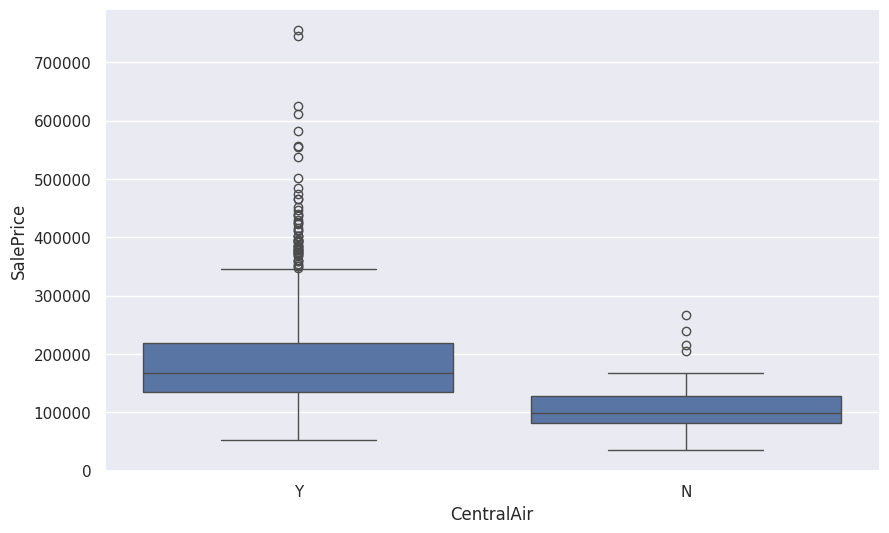

In [ ]:
# Plot SalePrice vs Central Air
plt.figure(figsize=(10, 6))
sns.boxplot(x='CentralAir', y='SalePrice', data=df_train)

In [ ]:
# Count CentralAir
df_train['CentralAir'].value_counts()

,count
CentralAir,
Y,1365
N,95


<Axes: xlabel='Electrical', ylabel='SalePrice'>

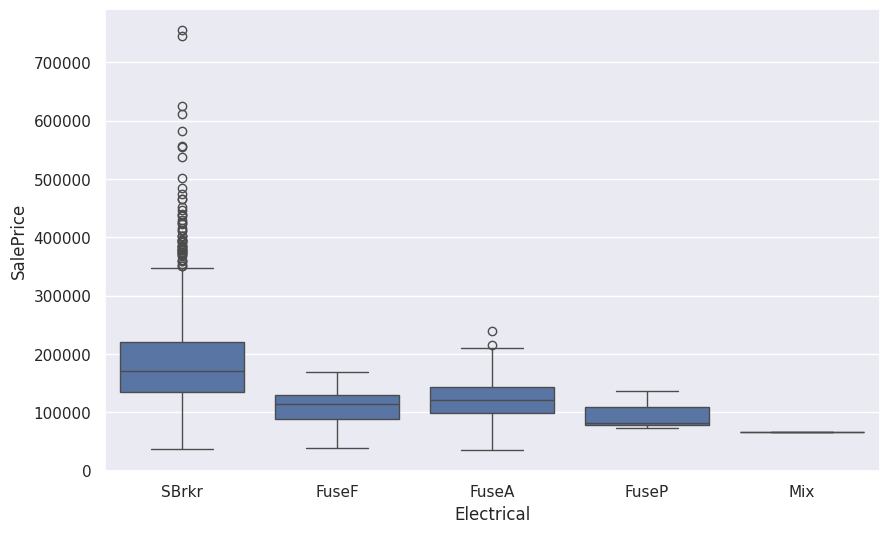

In [ ]:
# Plot SalePrice vs Electrical
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electrical', y='SalePrice', data=df_train)

Maybe simplify this to SBrkr or not

In [ ]:
df_train['Electrical'].value_counts()

,count
Electrical,
SBrkr,1335
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
# Combining Exterior1st and Exterior2nd into a single variable
df_train['ExteriorCombo'] = df_train[['Exterior1st', 'Exterior2nd']].apply(lambda x: '_'.join(sorted([str(v) for v in x if pd.notnull(v)])), axis=1)

# Identify rare categories (less than 15 occurrences)
combo_counts = df_train['ExteriorCombo'].value_counts()
rare_combos = combo_counts[combo_counts < 15].index

# Replace rare categories with 'Other'
df_train['ExteriorCombo'] = df_train['ExteriorCombo'].apply(lambda x: 'Other' if x in rare_combos else x)

print(df_train['ExteriorCombo'].value_counts())

ExteriorCombo
VinylSd_VinylSd    502
MetalSd_MetalSd    212
HdBoard_HdBoard    193
Wd Sdng_Wd Sdng    177
Other              118
Plywood_Plywood     96
CemntBd_CmentBd     59
HdBoard_Plywood     25
BrkFace_BrkFace     24
Stucco_Stucco       20
Wd Shng_WdShing     17
AsbShng_AsbShng     17
Name: count, dtype: int64


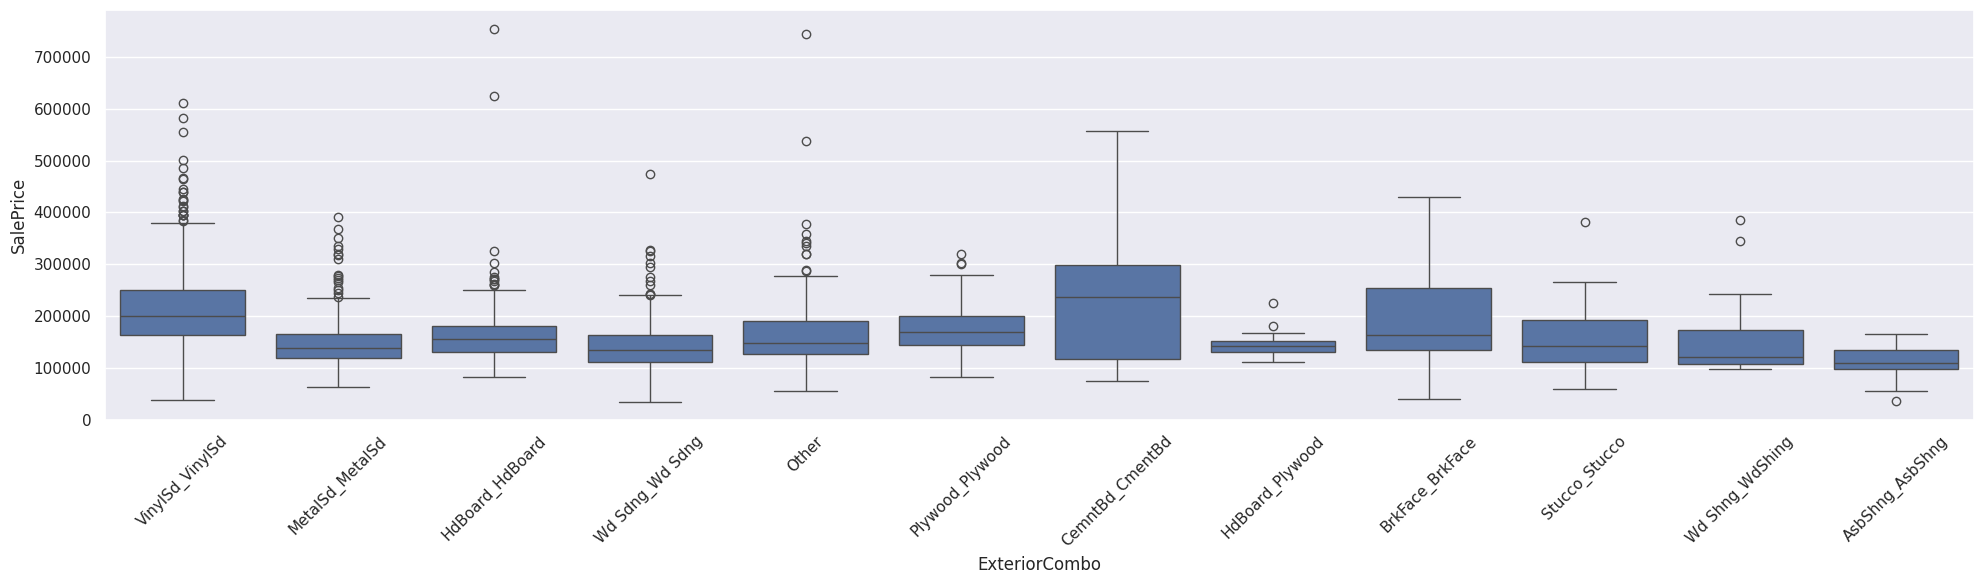

In [ ]:
# Calculate the order of ExteriorCombo based on value counts
order = df_train['ExteriorCombo'].value_counts().index

# Plot SalePrice vs ExteriorCombo with sorted x-axis
plt.figure(figsize=(20, 6))
sns.boxplot(x='ExteriorCombo', y='SalePrice', data=df_train, order=order)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Optional: makes sure labels don't get cut off
plt.show()

**TAKEAWAY:** Interestingly enought the most common combinations of exterior have the same for Exterior1st and Exterior2nd.